# Project: Investigate IMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<p></p>
<font color='#337ab7'>
<b>TMDb movie dataset:</b> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The goal of the analysis is to answer the following questions:

1. What are the most and least profitable movies in a given dataframe based on the adjusted budget and revenue?
2. Are longer movies and series more popular among IMDB users?
3. What are the best and worst rated genres among IMDB users?
4. Do IMDB users vote more for popular or unpopular movies?

</font>

In [1]:
#Import statements for all of the packages required to perform the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
<p></p>
<font color='#337ab7'>
<b>Dataset analysis steps:</b> 

- Load the data and overview each column using the head function.
- Make sure the columns are named properly.
- Analyze each column's data type.
- Understand how many special character separated values are stored in certain column. 
- Get the number of duplicate rows
- Analyze the number of movies with zero budget and revenue
- Check if all the movies are unique.
</font>

### General Properties

In [2]:
#Read the CSV file and display the content to understand the data.
df = pd.read_csv ('tmdb-movies.csv')
df.head(3)
#cast, genres and production_companies columns combine multiple values separated by “|” character 
#budget_adj and revenue_adj columns contain are foat when original budget and revenue are integers

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#Get the number of rows and columns and analyze the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<font color='#337ab7'>The dataset contains 10866 rows and 21 columns, all the columns seem to have an appropriate data type. The release_date data type requires the further investigation. Some of the columns contain missing values, but the content of these columns is not essential to the analysis. The column names are properly formatted, so there is no need to rename any columns.</font>

In [4]:
#The data types of all columns seem to be appropriate except the release_date field
#Check the data type of the release_date field
type(df['release_date'][0])
#The data type is str

str

<font color='#337ab7'>It appears that realease_date data type is string.</font>

In [5]:
#Get the maximum number of values in genres and production_companies
#Since the values in these columns are separated by "|" character, count the number of times this character is repeated
#in each of these columns and add 1 to the result to get the actual number of the values.
num_genres = df.genres.str.count('\|').max()
print (num_genres + 1)
num_pc = df.production_companies.str.count('\|').max()
print (num_pc + 1)

5.0
5.0


<font color='#337ab7'>There are maximum 5 values separated by "|" special character in both genres and production_companies columns.</font>

In [6]:
#get the number of duplicated rows
df.duplicated().sum()

1

<font color='#337ab7'>There is only one duplicate row in the entire dataset</font>

In [7]:
#Get the number of zero budget and zero revenue movies
df_zb = df.query('budget == 0')
print (df_zb.imdb_id.count())
df_zr = df.query('revenue == 0')
print (df_zr.imdb_id.count())

5687
6006


<font color='#337ab7'>There are 5687 zero budget and 6006 zero revenue rows.</font>

In [8]:
#Check if all of the movies are unique.
df['imdb_id'].nunique()
#Yes, all the movies are unique, as number of unique equals to the number of rows.

10855

<font color='#337ab7'>All the movies seem to be unique based on the imdb_id field.</font>

### Data Cleaning

In [9]:
#drop the duplicated rows
df.drop_duplicates( keep='first', inplace = True)
#check if the duplicated row got dropped
df.duplicated().sum()

0

<font color='#337ab7'>The duplicate row has been dropped.</font>

In [10]:
#Convert the release_date field to a more appropriate data type - datetime64, and verify the result of this conversion.
df['release_date'] = df['release_date'].astype('datetime64')
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

<font color='#337ab7'>The release_date field has been converted to data_time data type.</font>

In [11]:
#Convert budget_adj and revenue_adj columns to integer and verify the result of this conversion.
df['budget_adj'] = df['budget_adj'].astype('int64')
print(type(df['budget_adj'][0]))
df['revenue_adj'] = df['revenue_adj'].astype('int64')
print(type(df['revenue_adj'][0]))
#Update the adj values to show in millions for easier analysis
df['budget_adj'] = df['budget_adj'] / 1000000
df['revenue_adj'] =df['revenue_adj'] / 1000000

<class 'numpy.int64'>
<class 'numpy.int64'>


<font color='#337ab7'>Since the adjusted budget and revenue contains too many characters, both fields have been converted to reflect the values in millions.</font>

In [12]:
#Create additional rows for the values in genres and production_companies in order to perform an extensive analysis. 
#Split the values in genres column by "|" character. Then apply the pandas series function to each row to create
#a one dimensional ndarray. The stack function returns the series object having a multi-level index reshaped as single rows.
df_genres = df['genres'].str.split('\|').apply(pd.Series, 1).stack()
df_genres.index = df_genres.index.droplevel(-1) #to line up with df's index
df_genres.name = 'genres' #name the column
del df['genres'] #delete the original genres column
df_adj = df.join(df_genres) #join the original df with the newly created df_generes

<font color='#337ab7'>Since genres column combines multiple values, the content of this columns has been split into individual genres. In order to perform an analysis based on the genre, each genre has been recorded its individual row.</font>

In [13]:
#Check if the genres column got split into single values
df_adj.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.999939,1392.445892,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.999939,1392.445892,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.999939,1392.445892,Science Fiction


<font color='#337ab7'>Each genre is now reflected in a separate row.</font>

In [14]:
#Save the formatted dataframe into a new CSV file
df_adj.to_csv('tmdb_movies.csv', index=False)

<font color='#337ab7'>The formatted dataframe has been saved as a new file for further use.</font>

<a id='eda'></a>
## Exploratory Data Analysis
<p></p>

### Research Question 1 (What are the most and least profitable movies in a given dataframe based on the adjusted budget and revenue?)

In [15]:
#Load the CSV file
df = pd.read_csv ('tmdb_movies.csv')

In [16]:
#Add a new column - adj_profit by subtracting adj_budget from adj_revenue
df['adj_profit'] = df.revenue_adj - df.budget_adj 
df['adj_profit'] = df['adj_profit'].astype('int64')
df.head(5) #check if the new columns was created
df_adj.to_csv('tmdb_movies.csv', index=False) #save the changes to tmdb_movies.csv

<font color='#337ab7'>The above operations have been performed in order to calculate the profitability of each movie. The adjusted budget and revenue have been selected to calculate the profitability, as this will allow to perform a fair comparison of the movies that were released in different year, since the inflation factor will be eliminated.</font>

In [17]:
#Get top 10 most profitable movies
#Since there are movies that appear more than once in the dataframe, use the average values.
#Create a new dataframe grouped by imdb_id and original_title and calculate the average adj_profit.
df_prof_mean = df.groupby(['imdb_id', 'original_title'], as_index=False).adj_profit.mean()
#Get top 10 most profitable movies using pandas nlargest function.
df_top_prof = df_prof_mean.nlargest(10, 'adj_profit')
#check the results
df_top_prof.head()

,imdb_id,original_title,adj_profit
738,tt0076759,Star Wars,2750
6131,tt0499549,Avatar,2586
3263,tt0120338,Titanic,2234
516,tt0070047,The Exorcist,2128
620,tt0073195,Jaws,1878


<font color='#337ab7'>The above operations have been performed to get the top 10 most profitable movies.</font>

In [18]:
#Get bottom 10 least profitable movies using pandas nsmallest function.
df_bottom_prof = df_prof_mean.nsmallest(10, 'adj_profit')
#Check the results
df_bottom_prof.head()

,imdb_id,original_title,adj_profit
6833,tt1032751,The Warrior's Way,-413
7320,tt1210819,The Lone Ranger,-155
6211,tt0780653,The Wolfman,-150
400,tt0066549,Waterloo,-140
4607,tt0318974,The Alamo,-137


<font color='#337ab7'>The above operations have been performed to get 10 least profitable movies.</font>

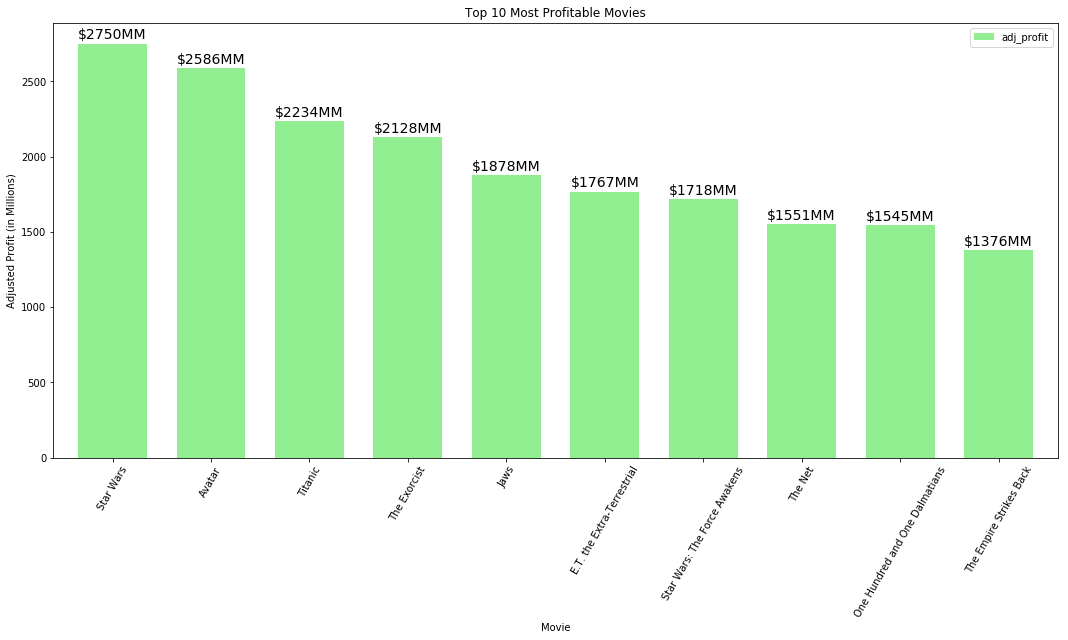

In [19]:
#Build a bar chart for top 10 most profitable movies
labels = df_top_prof['original_title'].values #tick labels on x axis
#build a chart, width changes the width of the the bars for labels to line up
ax = df_top_prof.plot(kind='bar', figsize=((18, 8)), width=0.7, color='lightgreen')
#assign the title and axis labels
ax.set_title('Top 10 Most Profitable Movies')
ax.set_xlabel('Movie')
ax.set_ylabel('Adjusted Profit (in Millions)')
ax.set_xticklabels(labels, rotation=60) #assign and rotate labels

#Define an array to hold the label values and fill it up from ax bar chart object
totals = []
for i in ax.patches:
    totals.append(i.get_height())
    
#Set individual bar labels using above list
total = sum(totals)

#Set individual bar labels using above list
for i in ax.patches:
    #get_x pulls left or right; get_height pushes up or down. i.get_height()+30 is to move the labels so they don't overlap
    #with the bars
    ax.text(i.get_x(), i.get_height()+30, \
            '$' + str(round((i.get_height()), 0)) + 'MM', fontsize=14,
                color='black')

<font color='#337ab7'>The result of the above operations is the visual representation of the top 10 most profitable movies.</font>

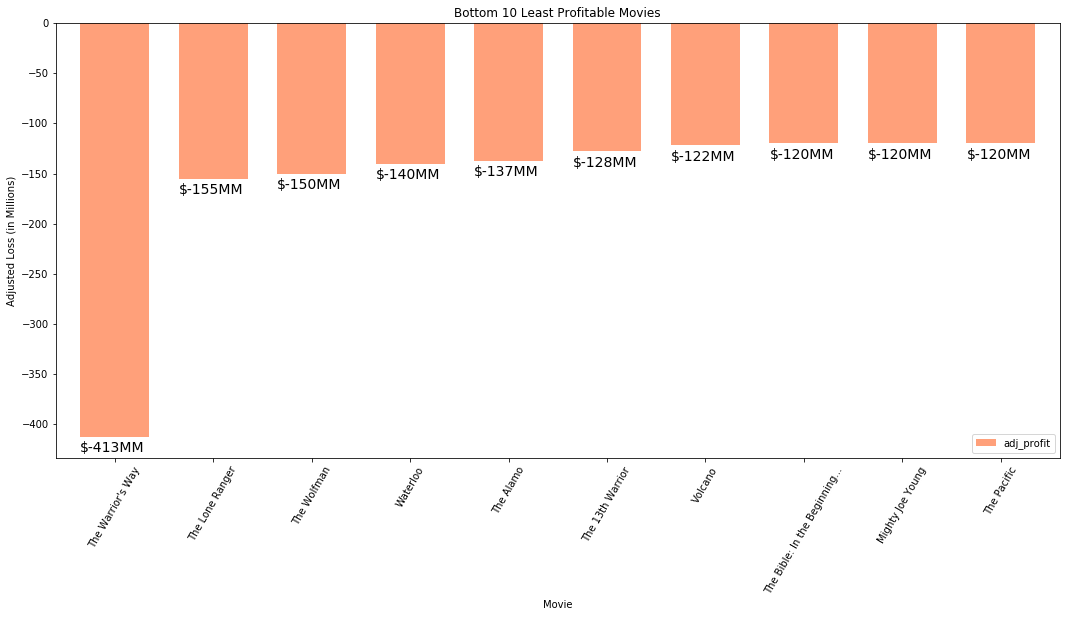

In [20]:
#Build a bar chart for 10 least profitable movies.
labels = df_bottom_prof['original_title'].values #tick lables on x axis.
#Build a chart, width changes the width of the the bars for labels to line up.
ax = df_bottom_prof.plot(kind='bar', figsize=((18, 8)), width=0.7, color='lightsalmon')
#Assign the title and axis labels
ax.set_title('Bottom 10 Least Profitable Movies')
ax.set_xlabel('Movie')
ax.set_ylabel('Adjusted Loss (in Millions)')
ax.set_xticklabels(labels, rotation=60) #assign and rotate labels.

#Define an array to hold the label values and fill it up from ax bar chart object.
totals = []
for i in ax.patches:
    totals.append(i.get_height())
    
#Set individual bar labels using above list.
total = sum(totals)

#Set individual bar labels using above list.
for i in ax.patches:
    #get_x pulls left or right; get_height pushes up or down. i.get_height()-15 is to move the labels so they don't overlap
    ax.text(i.get_x(), i.get_height()-15, \
            '$' + str(round((i.get_height()), 0)) + 'MM', fontsize=14,
                color='black')

<font color='#337ab7'>The result of the above operations is the visual representation of 10 least profitable movies.</font>

### Research Question 2  (Are longer movies and series more popular among IMDB users?)

In [21]:
#Drop duplicates
df.drop_duplicates(subset='imdb_id', keep="first", inplace = True)
#Remove 0 runtime movies
df_run = df.query('runtime > 0')
#Get median runtime
print(df_run.runtime.median())
#Get 50 % from median runtime
print(df_run.runtime.median() / 2)

99.0
49.5


<font color='#337ab7'>For this analysis the duplicate movies have been dropped. The 0 runtime movies have been filtered out as well. The median runtime value has been calculated in order to come up with 3 runtime groups.</font>

In [22]:
#Create 3 runtime groups based on runtime median value and 50% from median
df_short = df_run.query('1 <= runtime< 49.5') #group short
df_average = df_run.query('49.5 <= runtime < 148.5') #group average
df_long = df_run.query('runtime >= 148.5') #group long

<font color='#337ab7'>3 runtime groups have been created: short, average and long runtime.</font>

[0.37, '0.64', 1.05]


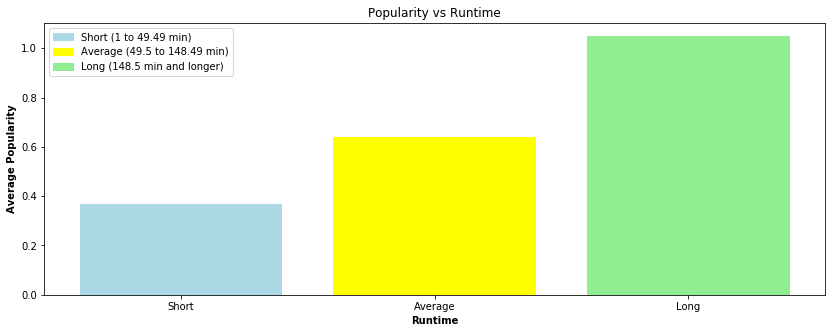

In [28]:
#Get the average popularity of the above groups and store in an array.
#The second value was not giving the correct number of decimals when round(2) method was called, hence format function was used.
chart_val = [df_short.popularity.mean().round(2), format(df_average.popularity.mean(), '.2f') , df_long.popularity.mean().round(2)]
print (chart_val)

#Build a bar chart comparing the average popularity of the 3 runtime groups.
locations = [1, 2, 3]
labels = ['Short', 'Average', 'Long'] #tick labels on x axis
colors = ['lightblue', 'yellow', 'lightgreen'] #color each bar
plt.bar(locations, [float(x) for x in chart_val], tick_label=labels, color=colors, width=0.8)
plt.title('Popularity vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')
plt.rcParams["figure.figsize"] = (14, 5) #resize the plot
plt.rcParams["axes.labelweight"] = "bold" #make axes labels font bold

#Add custom legend for better clarity.
short_patch = mpatches.Patch(color='lightblue', label='Short (1 to 49.49 min)')
average_patch = mpatches.Patch(color='yellow', label='Average (49.5 to 148.49 min)')
long_patch = mpatches.Patch(color='lightgreen', label='Long (148.5 min and longer)')
plt.legend(handles=[short_patch, average_patch, long_patch]);

<font color='#337ab7'>The result of the above operations is the visual representation of the popularity vs runtime for each of the earlier created groups. 
Short runtime movies popularity rating 0.37;
Average runtime movies popularity rating 0.64;
Long runtime movies popularity rating 1.05;
</font>

### Research Question 3  (What are the best and worst rated genres among IMDB users?)

In [24]:
#Read the tmdb_movies.csv again to exclude the previous formatting.
df = pd.read_csv ('tmdb_movies.csv')
#Remove nan values in vote_average, vote_count and genres columns.
df_no_nan = df.dropna(subset=['vote_average', 'vote_count', 'genres'])
#Exclude the movies with a low vote_count from the analysis.
#Movies where vote_count % is less than 10% from the average number of vote_counts are filtered out.
df_vote = df_no_nan.query('vote_count / vote_count.mean() > 0.1')
#vote_average

<font color='#337ab7'>The CSV file has been reloaded and the rows with 'nan' values in vote_average, vote_count and genres columns have been excluded to get the meaningful results. A decision has been made not to include the movies where vote_count % was less than 10% from the average number of vote_counts. This was done to eliminate a possibility where one vote can influence the rating.</font>

20


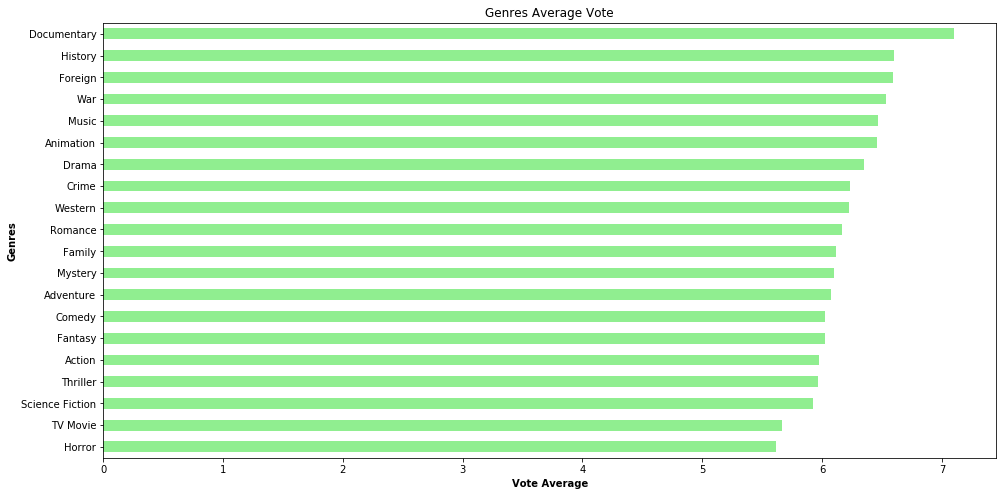

In [25]:
#Get the number of genres.
print(df_vote['genres'].nunique())
#Group the genres and get the average 
df_vote_mean = df_vote.groupby('genres').vote_average.mean()
#Make a barh chart
df_vote_mean.sort_values().plot.barh(figsize=(16, 8), color = 'lightgreen');
plt.title('Genres Average Vote')
plt.xlabel('Vote Average')
plt.ylabel('Genres');

<font color='#337ab7'>The result of the above operations is the visual representation of the genres average vote rating. There are 20 genres in total.</font>

### Research Question 4  (Do IMDB users vote more for popular or unpopular movies?)

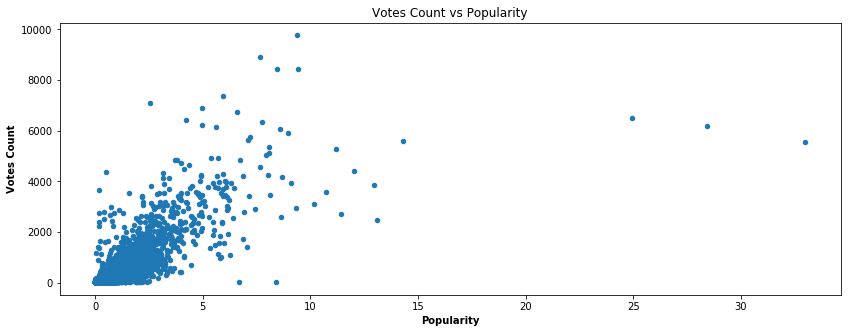

In [26]:
#Read the tmdb_movies.csv again to exclude the previous formatting.
df = pd.read_csv ('tmdb_movies.csv')
#drop duplicates based on imbd_id column
df.drop_duplicates(subset='imdb_id', keep='first', inplace = True)
#Make scatterplot chart
df.plot.scatter(x='popularity',y='vote_count');
plt.title('Votes Count vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Votes Count');

<font color='#337ab7'>The CSV file has been reloaded and duplicate movies have been removed. The scatterplot chart has been selected to visualize the correlation between the Popularity and Votes count.</font>

<a id='conclusions'></a>
## Conclusions
<p></p>
<font color='#337ab7'>
<b>Data Limitations:</b><br>    
The most notable limitations I encountered while exploring the IMDb dataset include:<br>
-The analysis by production companies is very limited, since the dataset combines multiple production companies into a single field. The fact that revenue and budget is not broken down by each studio makes it impossible to perform profitability analysis by the individual production company.<br>
-Several columns, such as budget and revenue, contained significant number of zero values, making the analysis results limited only to those movies where this data was present.<br>
-Some original titles were duplicated at the first glance, but looking at the other fields, such as release_year, made it clear that although some movies had identical titles, they were in fact different movies. This made it harder to group by original_title field and lead to using the imdb_id in addition to the original_title.<br>
-When performing a runtime vs. popularity analysis I discovered that many movies had their runtime value as zero. The zero runtime movies were excluded from the analysis.<br>
-Some of the movies had a very low number of vote counts; this could have led to unexpected results, therefore a decision has been made to exclude the movies where vote count was less than 10% from the average number of vote counts.<br>
<p></p> 
<p></p> 
<b>1. What are the most and least profitable movies in a given dataframe based on the adjusted budget and revenue?</b><br>
Based on the analysis of the adjusted profit the top 3 most profitable movies are:<br>
    1. Start Wars \$2750MM<br>
    2. Avatar \$2586MM<br>
    3. Titanic \$2234MM<br>
     <p></p>   
    The least profitable movies are:<br>
    1. The Warrior's Way (-\$413MM)<br>
    2. The Lone Rangerv (-\$155MM)<br>
    3. The Wolfman (-\$150MM)<br>
     <p></p>  
<b>2. Are longer movies and series more popular among IMDB users?</b><br>
The longer movies appear to be more popular among IMDB users.<br>
<table align="left" style="border-collapse: collapse; width: 400px; border: 1px solid #dddddd; padding: 8px; text-align: left;">
  <tr>
    <th style="border: 1px solid #dddddd; padding: 8px; text-align: left;">Runtime Category</th>
    <th style="border: 1px solid #dddddd; padding: 8px; text-align: left;">Average Popularity</th>
  </tr>
  <tr>
    <td style="border: 1px solid #dddddd; padding: 8px; text-align: left;">Short (1 to 49.49 min)</td>
    <td style="border: 1px solid #dddddd; padding: 8px; text-align: left;">0.37</td>
  </tr>
  <tr>
    <td style="border: 1px solid #dddddd; padding: 8px; text-align: left;">Average (49.5 to 148.49 min)</td>
    <td style="border: 1px solid #dddddd; padding: 8px; text-align: left;">0.64</td>
  </tr>
  <tr>
    <td style="border: 1px solid #dddddd; padding: 8px; text-align: left;">Long (148.5 min and longer)</td>
    <td style="border: 1px solid #dddddd; padding: 8px; text-align: left;">1.05</td>
  </tr>
</table> 
   
<p style="clear: both"><br>
<b>3. What are the best and worst rated genres among IMDB users?</b><br>
Documentary is the top rated genre, followed by History and Foreign.<br> 
On contrary Horror, TV Movie and Science Fiction are the lowest rated genres.<br>

<b>4. Do IMDB users vote more for popular or unpopular movies?</b><br>
Based on the votes count and popularity scatterplot, the IMDB users tend to cast more votes for more popular movies.
</p> 

</font>

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0